In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
file_path = "/kaggle/input/experiment-2-2-trainings-info/experiment-2_2-trainings-info.json"

with open(file_path, "r") as file:
    users = json.load(file)

df_training_info = pd.DataFrame(users)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_training_info

,user,number_of_sequences_and_targets_before_removal,number_of_sequences_and_targets_after_removal,number_of_unique_products_in_targets,number_of_categories_in_targets,number_of_unique_products_in_sequences_and_targets,number_of_categories,number_of_sequences_and_targets_after_dropping_duplicates_after_encoding,data_entropy,mean_number_of_records_per_category,number_of_sequences_and_targets_train,number_of_sequences_and_targets_validation,number_of_sequences_and_targets_test,number_of_unique_categories_in_targets_train,number_of_unique_categories_in_targets_validation,number_of_unique_categories_in_targets_test,test_weighted_avg_f1_model_lstm,test_weighted_avg_precision_model_lstm,test_weighted_avg_recall_model_lstm,test_macro_avg_f1_model_lstm,test_macro_avg_precision_model_lstm,test_macro_avg_recall_model_lstm,test_loss_model_lstm,test_accuracy_model_lstm,test_weighted_avg_f1_model_bi_lstm,test_weighted_avg_precision_model_bi_lstm,test_weighted_avg_recall_model_bi_lstm,test_macro_avg_f1_model_bi_lstm,test_macro_avg_precision_model_bi_lstm,test_macro_avg_recall_model_bi_lstm,test_loss_model_bi_lstm,test_accuracy_model_bi_lstm,test_weighted_avg_f1_model_gru,test_weighted_avg_precision_model_gru,test_weighted_avg_recall_model_gru,test_macro_avg_f1_model_gru,test_macro_avg_precision_model_gru,test_macro_avg_recall_model_gru,test_loss_model_gru,test_accuracy_model_gru,test_weighted_avg_f1_model_autoencoder,test_weighted_avg_precision_model_autoencoder,test_weighted_avg_recall_model_autoencoder,test_macro_avg_f1_model_autoencoder,test_macro_avg_precision_model_autoencoder,test_macro_avg_recall_model_autoencoder,test_loss_model_autoencoder,test_accuracy_model_autoencoder
0,user-1,79404,77941,466,15,28595,54,714,0.7279,47.600000,569,71,74,13,14,15,0.2757,0.2672,0.2973,0.0694,0.0656,0.0847,2.3904,0.2973,0.2826,0.2745,0.2973,0.0924,0.0911,0.0965,2.2699,0.2973,0.3445,0.3850,0.3378,0.1021,0.1028,0.1537,2.3091,0.3378,0.1984,0.3309,0.1757,0.0558,0.0782,0.0554,2.5606,0.1757
1,user-2,65216,64030,274,14,24815,54,928,0.8278,66.285714,743,93,92,14,14,14,0.1377,0.1548,0.1522,0.0654,0.0680,0.0940,2.3511,0.1522,0.1957,0.3785,0.1848,0.0910,0.1585,0.1077,2.5309,0.1848,0.1619,0.2053,0.1413,0.0685,0.0850,0.0646,2.5185,0.1413,0.1843,0.2175,0.1739,0.0741,0.0929,0.0676,2.3915,0.1739
2,user-3,51055,50260,179,7,21746,50,498,0.7084,71.142857,398,49,51,7,7,7,0.3051,0.3529,0.3725,0.1343,0.1536,0.1583,1.6818,0.3725,0.2827,0.3094,0.3922,0.1042,0.1156,0.1436,1.7477,0.3922,0.3125,0.2893,0.3922,0.1157,0.1078,0.1444,1.7159,0.3922,0.3745,0.4061,0.4706,0.1391,0.1524,0.1733,1.7339,0.4706
3,user-4,44854,44021,130,5,19285,53,410,0.6957,82.000000,329,39,42,5,5,5,0.4229,0.3462,0.5476,0.2397,0.2128,0.2833,1.4890,0.5476,0.4156,0.3265,0.5714,0.1455,0.1143,0.2000,1.5030,0.5714,0.4107,0.3286,0.5476,0.1437,0.1150,0.1917,1.5147,0.5476,0.4380,0.4129,0.4762,0.1965,0.1788,0.2250,1.5264,0.4762
4,user-5,48105,47373,173,8,20615,50,464,0.7579,58.000000,372,45,47,7,7,8,0.2962,0.2519,0.3617,0.1019,0.0895,0.1202,1.9575,0.3617,0.2653,0.1974,0.4043,0.0742,0.0552,0.1131,1.8807,0.4043,0.3266,0.2577,0.4468,0.1070,0.0833,0.1503,1.8521,0.4468,0.3195,0.2641,0.4043,0.0953,0.0786,0.1210,1.9151,0.4043
5,user-6,42650,41969,124,5,19503,46,401,0.7183,80.200000,321,41,39,5,5,5,0.3477,0.2630,0.5128,0.1356,0.1026,0.2000,1.4189,0.5128,0.3800,0.3476,0.4359,0.1665,0.1566,0.1862,1.3586,0.4359,0.3897,0.3818,0.5128,0.1607,0.1722,0.2054,1.3685,0.5128,0.4466,0.4023,0.5128,0.1917,0.1760,0.2162,1.4426,0.5128
6,user-7,35017,34360,101,6,16118,45,394,0.6229,65.666667,314,41,39,6,6,6,0.3566,0.3217,0.4103,0.1239,0.1136,0.1405,1.5590,0.4103,0.3595,0.3476,0.3846,0.1368,0.1296,0.1500,1.5692,0.3846,0.3614,0.3555,0.3846,0.1369,0.1315,0.1500,1.6243,0.3846,0.3480,0.2707,0.4872,0.1131,0.0880,0.1583,1.6324,0.4872
7,user-8,27036,26525,101,3,15638,47,331,0.6679,110.333333,263,34,34,3,3,3,0.4672,0.4714,0.5000,0.3127,0.3215,0.3296,1.6708,0.5000,0.4745,0.4998,0.5000,0.3309,0.3412,0.3556,1.6182,0.5000,0.4672,0.4714,0.5000,0.3127,0.32

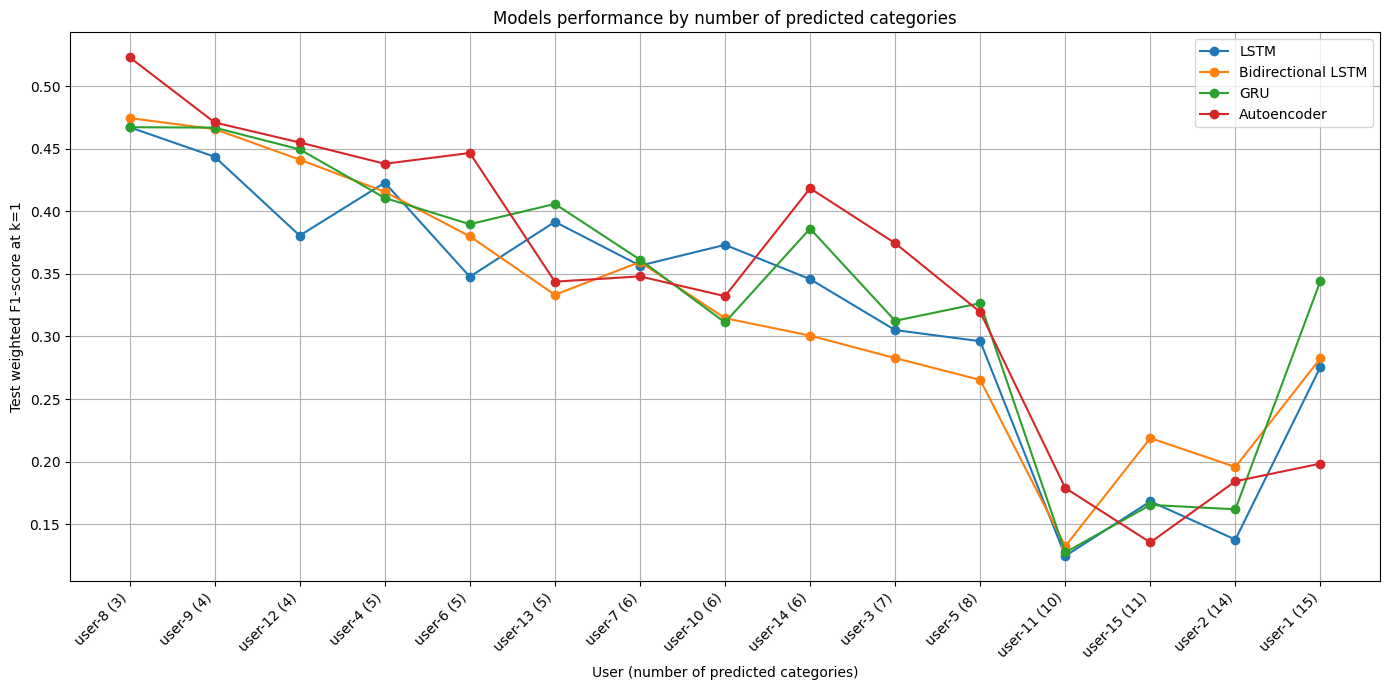

In [5]:
df_training_info_copy = df_training_info.sort_values('number_of_categories_in_targets').copy()

df_training_info_copy['x_labels'] = df_training_info_copy.apply(
    lambda x: f"{x['user']} ({x['number_of_categories_in_targets']})", 
    axis=1)

plt.figure(figsize=(14, 7))

plt.plot(df_training_info_copy['x_labels'], df_training_info_copy['test_weighted_avg_f1_model_lstm'], marker='o', label='LSTM')
plt.plot(df_training_info_copy['x_labels'], df_training_info_copy['test_weighted_avg_f1_model_bi_lstm'], marker='o', label='Bidirectional LSTM')
plt.plot(df_training_info_copy['x_labels'], df_training_info_copy['test_weighted_avg_f1_model_gru'], marker='o', label='GRU')
plt.plot(df_training_info_copy['x_labels'], df_training_info_copy['test_weighted_avg_f1_model_autoencoder'], marker='o', label='Autoencoder')

plt.title('Models performance by number of predicted categories')
plt.xlabel('User (number of predicted categories)')
plt.ylabel('Test weighted F1-score at k=1')

plt.grid(True)
plt.legend()

tick_positions = range(len(df_training_info_copy['x_labels']))
plt.xticks(ticks=tick_positions, labels=df_training_info_copy['x_labels'], rotation=45, ha='right', va='top')

plt.tight_layout()
plt.show()

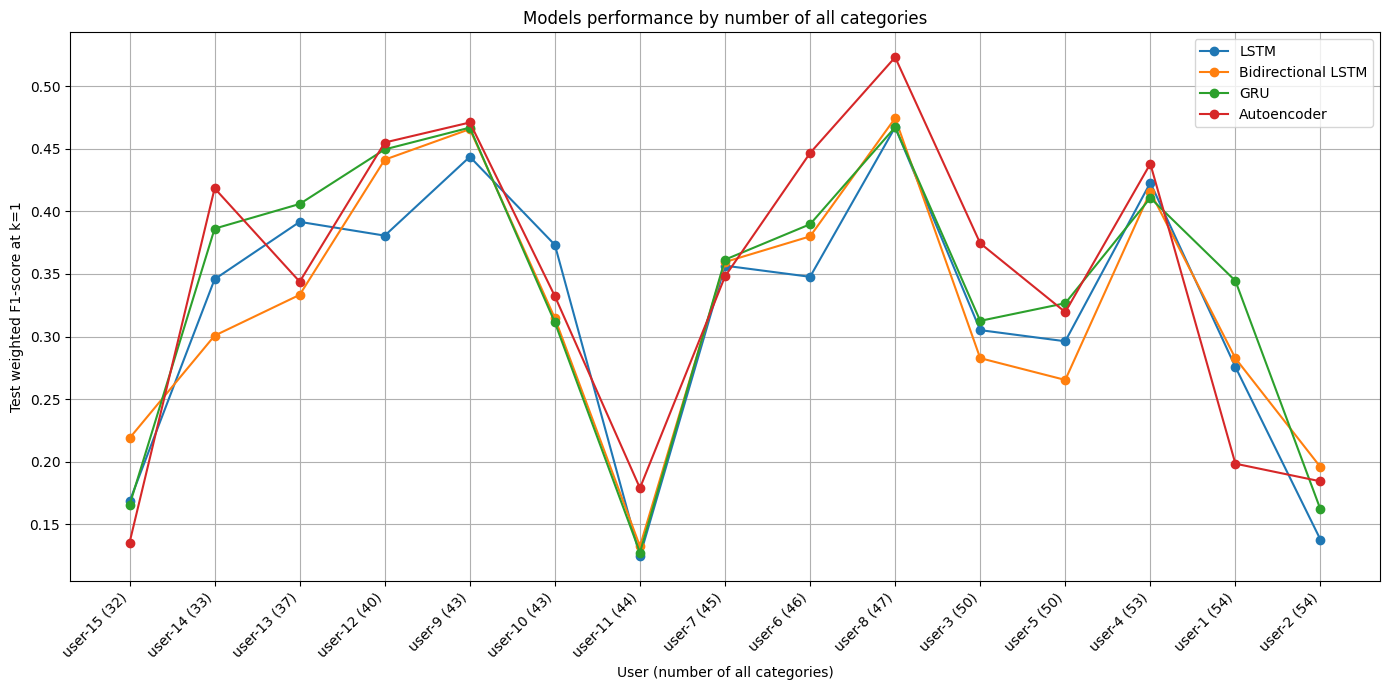

In [6]:
df_training_info_copy = df_training_info.sort_values('number_of_categories').copy()

df_training_info_copy['x_labels'] = df_training_info_copy.apply(
    lambda x: f"{x['user']} ({x['number_of_categories']})", 
    axis=1)

plt.figure(figsize=(14, 7))

plt.plot(df_training_info_copy['x_labels'], df_training_info_copy['test_weighted_avg_f1_model_lstm'], marker='o', label='LSTM')
plt.plot(df_training_info_copy['x_labels'], df_training_info_copy['test_weighted_avg_f1_model_bi_lstm'], marker='o', label='Bidirectional LSTM')
plt.plot(df_training_info_copy['x_labels'], df_training_info_copy['test_weighted_avg_f1_model_gru'], marker='o', label='GRU')
plt.plot(df_training_info_copy['x_labels'], df_training_info_copy['test_weighted_avg_f1_model_autoencoder'], marker='o', label='Autoencoder')

plt.title('Models performance by number of all categories')
plt.xlabel('User (number of all categories)')
plt.ylabel('Test weighted F1-score at k=1')

plt.grid(True)
plt.legend()

tick_positions = range(len(df_training_info_copy['x_labels']))
plt.xticks(ticks=tick_positions, labels=df_training_info_copy['x_labels'], rotation=45, ha='right', va='top')

plt.tight_layout()
plt.show()

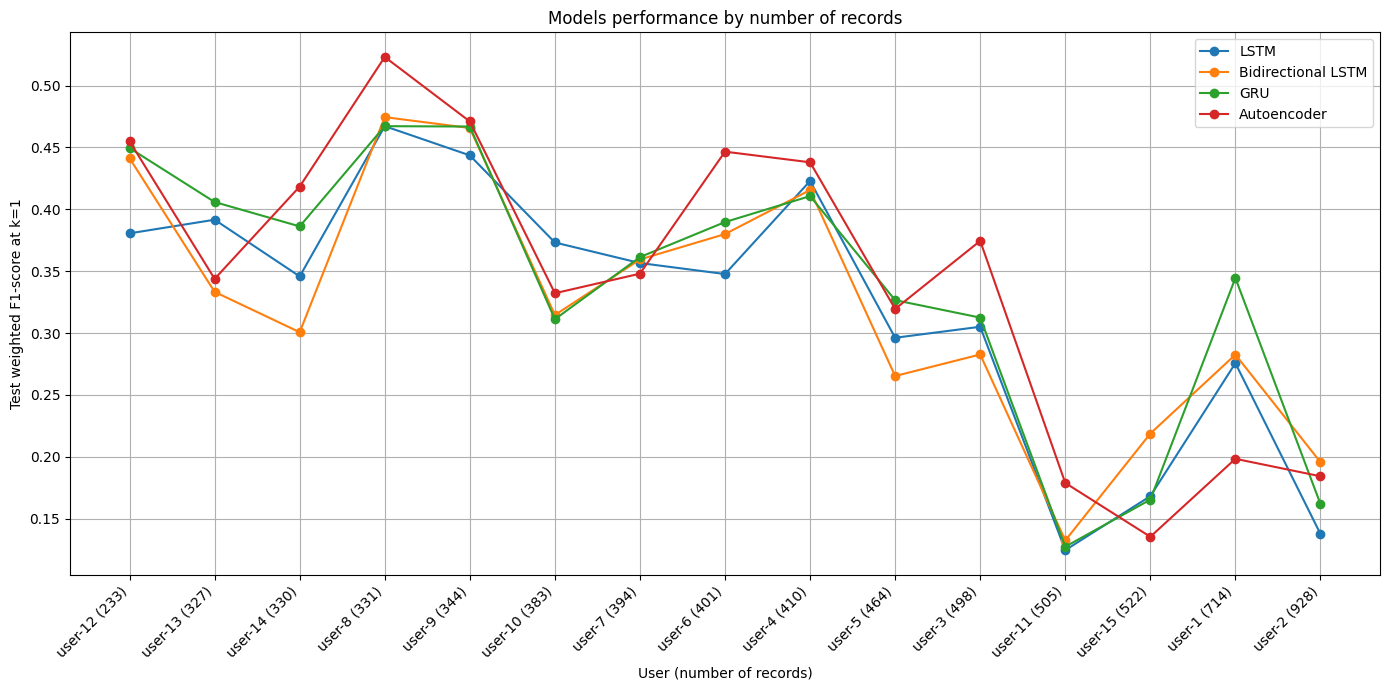

In [7]:
df_training_info_copy = df_training_info.sort_values('number_of_sequences_and_targets_after_dropping_duplicates_after_encoding').copy()

df_training_info_copy['x_labels'] = df_training_info_copy.apply(
    lambda x: f"{x['user']} ({x['number_of_sequences_and_targets_after_dropping_duplicates_after_encoding']})", 
    axis=1)

plt.figure(figsize=(14, 7))

plt.plot(df_training_info_copy['x_labels'], df_training_info_copy['test_weighted_avg_f1_model_lstm'], marker='o', label='LSTM')
plt.plot(df_training_info_copy['x_labels'], df_training_info_copy['test_weighted_avg_f1_model_bi_lstm'], marker='o', label='Bidirectional LSTM')
plt.plot(df_training_info_copy['x_labels'], df_training_info_copy['test_weighted_avg_f1_model_gru'], marker='o', label='GRU')
plt.plot(df_training_info_copy['x_labels'], df_training_info_copy['test_weighted_avg_f1_model_autoencoder'], marker='o', label='Autoencoder')

plt.title('Models performance by number of records')
plt.xlabel('User (number of records)')
plt.ylabel('Test weighted F1-score at k=1')

plt.grid(True)
plt.legend()

tick_positions = range(len(df_training_info_copy['x_labels']))
plt.xticks(ticks=tick_positions, labels=df_training_info_copy['x_labels'], rotation=45, ha='right', va='top')

plt.tight_layout()
plt.show()

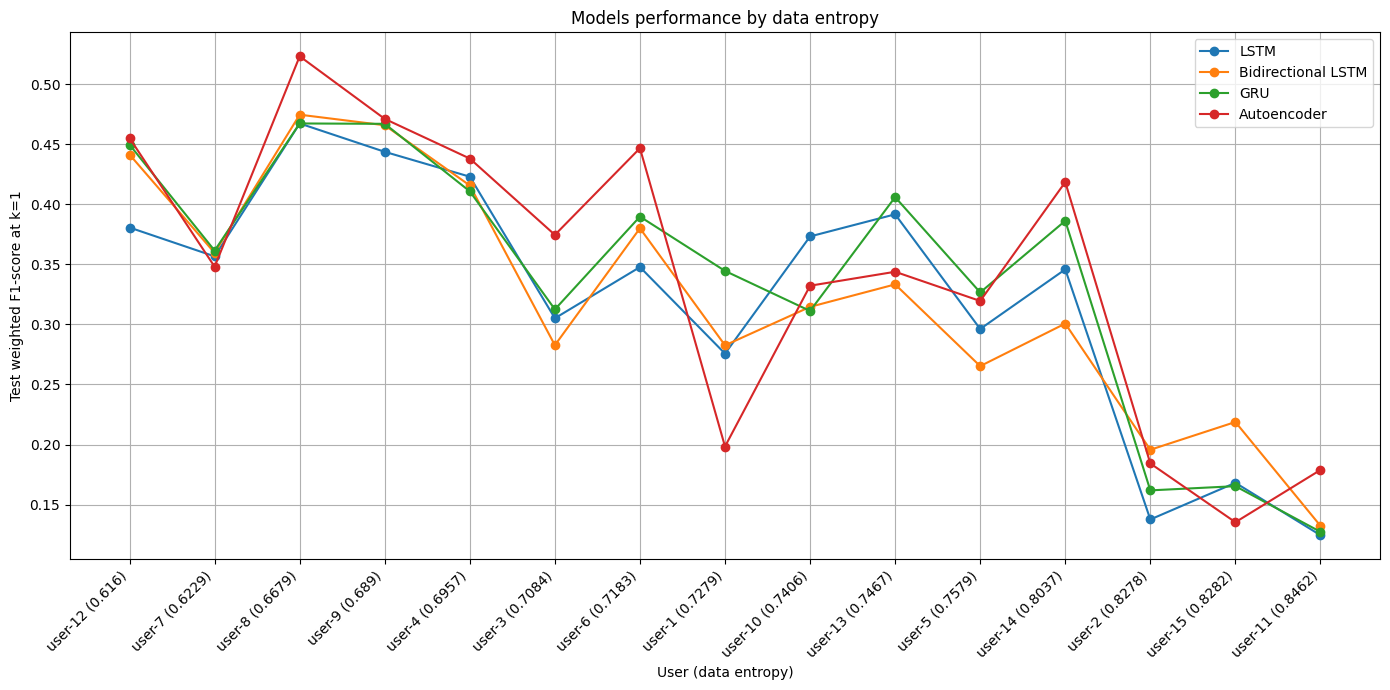

In [8]:
df_training_info_copy = df_training_info.sort_values('data_entropy').copy()

df_training_info_copy['x_labels'] = df_training_info_copy.apply(
    lambda x: f"{x['user']} ({x['data_entropy']})", 
    axis=1)

plt.figure(figsize=(14, 7))

plt.plot(df_training_info_copy['x_labels'], df_training_info_copy['test_weighted_avg_f1_model_lstm'], marker='o', label='LSTM')
plt.plot(df_training_info_copy['x_labels'], df_training_info_copy['test_weighted_avg_f1_model_bi_lstm'], marker='o', label='Bidirectional LSTM')
plt.plot(df_training_info_copy['x_labels'], df_training_info_copy['test_weighted_avg_f1_model_gru'], marker='o', label='GRU')
plt.plot(df_training_info_copy['x_labels'], df_training_info_copy['test_weighted_avg_f1_model_autoencoder'], marker='o', label='Autoencoder')

plt.title('Models performance by data entropy')
plt.xlabel('User (data entropy)')
plt.ylabel('Test weighted F1-score at k=1')

plt.grid(True)
plt.legend()

tick_positions = range(len(df_training_info_copy['x_labels']))
plt.xticks(ticks=tick_positions, labels=df_training_info_copy['x_labels'], rotation=45, ha='right', va='top')

plt.tight_layout()
plt.show()